In [30]:
import os

In [31]:
list_dir = os.listdir('.')
patients = [patient for patient in list_dir if "patient" in patient]
patient_numbers = [patient[7:12] for patient in patients]

In [32]:
# after running, be sure to move positive and negative directories manually into new directory called elbow_train

# delete all remaining patient directories that have multiple studies

# refactor below code into def

positive_dir = 'positive'
negative_dir = 'negative'

def move_files():
    
    patient_count = 0
    
    for filename in os.listdir('.'):

        if filename.startswith('patient'):

            patient_dir = os.listdir('patient' + patient_numbers[patient_count])
            patient_dir_path = 'patient' + patient_numbers[patient_count]

            if len(patient_dir) == 1:

                if 'positive' in patient_dir[0]:

                    study_dir = os.listdir('patient' + patient_numbers[patient_count] + '\\' + 'study1_' + 'positive')
                    study_dir_path = 'patient' + patient_numbers[patient_count] + '\\' + 'study1_' + 'positive'

                    for i in range(0,len(study_dir)):

                        img_name = study_dir_path + '\\' + 'image' + str(i + 1) + '.png'
                        sub_dir = '\\' + patient_numbers[patient_count] + '-' + str(i + 1)
                        new_dest = positive_dir + sub_dir + '.png'

                        os.rename(img_name, new_dest)

                    os.rmdir(study_dir_path)

                else:

                    study_dir = os.listdir('patient' + patient_numbers[patient_count] + '\\' + 'study1_' + 'negative')
                    study_dir_path = 'patient' + patient_numbers[patient_count] + '\\' + 'study1_' + 'negative'

                    for i in range(0,len(study_dir)):

                        img_name = study_dir_path + '\\' + 'image' + str(i + 1) + '.png'
                        sub_dir = '\\' + patient_numbers[patient_count] + '-' + str(i + 1)
                        new_dest = negative_dir + sub_dir + '.png'

                        os.rename(img_name, new_dest)

                    os.rmdir(study_dir_path)

                os.rmdir(patient_dir_path)

            patient_count = patient_count + 1

In [33]:
move_files()

Now for the Valid iamges and the directory restructure

In [ ]:
list_dir = os.listdir('.')
patients = [patient for patient in list_dir if "patient" in patient]
patient_numbers = [patient[7:12] for patient in patients]

In [ ]:
# manually create elbow_valid, positive, and negative directory before running below code (all in same directory)

move_files()

In [ ]:
list_dir = os.listdir('.')
patients = [patient for patient in list_dir if "patient" in patient]
patient_numbers = [patient[7:12] for patient in patients]

In [ ]:
# manually create elbow_test, positive, and negative directory before running below code (all in same directory)

move_files()

In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

Using TensorFlow backend.


In [34]:
train_path = 'elbow_train'
valid_path = 'elbow_valid'
test_path = 'elbow_test'

In [35]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['positive','negative'], batch_size=20)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['positive','negative'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['positive','negative'], batch_size=20)

Found 1398 images belonging to 2 classes.
Found 430 images belonging to 2 classes.
Found 86 images belonging to 2 classes.


In [5]:
# # not essential - just to see the images plotted

# def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if (ims.shape[-1] != 3):
#             ims = ims.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     for i in range(len(ims)):
#         sp = f.add_subplot(rows, cols, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=10)
#         plt.imshow(ims[i], interpolation=None if interp else 'none')

In [6]:
# imgs, labels = next(train_batches)

C:\Users\andyj\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


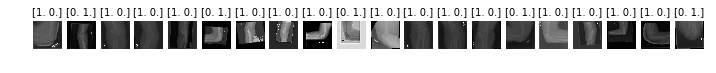

In [7]:
# plots(imgs, titles=labels)

In [23]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(6, activation='relu', input_dim=4),
    Dense(6, activation='relu'),
    Dense(2, activation='softmax'),
])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_4 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 9462534   
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 14        
Total params: 9,463,486
Trainable params: 9,463,486
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit_generator(train_batches, steps_per_epoch=70,
                   validation_data=valid_batches, validation_steps=43, epochs=5, verbose=2)

# model.fit(
#     train_batches,
#     valid_batches,
#     epochs=5,
#     shuffle=True,
#     verbose=2
# )

Epoch 1/5
 - 44s - loss: 4.8942 - acc: 0.6924 - val_loss: 8.2090 - val_acc: 0.4907
Epoch 2/5
 - 49s - loss: 4.5195 - acc: 0.7196 - val_loss: 7.9841 - val_acc: 0.5047
Epoch 3/5
 - 49s - loss: 4.6576 - acc: 0.7110 - val_loss: 8.3964 - val_acc: 0.4791
Epoch 4/5
 - 56s - loss: 4.4721 - acc: 0.7225 - val_loss: 8.0216 - val_acc: 0.5023
Epoch 5/5
 - 53s - loss: 4.9492 - acc: 0.6929 - val_loss: 7.8716 - val_acc: 0.5116


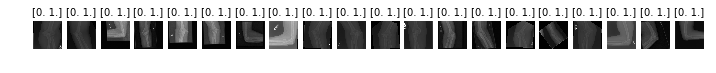

In [36]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [37]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [38]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [39]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [40]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0 20]
 [ 0  0]]


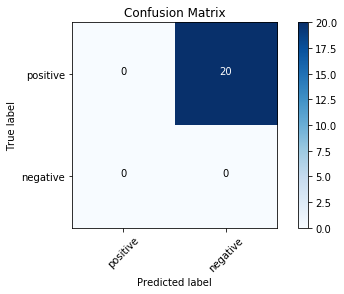

In [42]:
cm_plot_labels = ['positive', 'negative']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')